In [1]:
from datasets import load_dataset
from transformers import AutoImageProcessor
import numpy as np
from PIL import Image
import cv2
import os
from torchvision.transforms import (
    RandomRotation,
    ColorJitter,
    GaussianBlur,
    RandomAffine,
    CenterCrop,
    Compose,
    Normalize,
    RandomHorizontalFlip,
    RandomResizedCrop,
    Resize,
    ToTensor,
)

c:\Users\Jayesh\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Jayesh\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 'Could not find module 'C:\Users\Jayesh\AppData\Local\Programs\Python\Python39\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
dataset = load_dataset("imagefolder", data_dir="hf_head_dataset")
# id2label = {0 : "Normal", 1 : "Abnormal"}
# label2id = {"Normal" : 0, "Abnormal" : 1}
# model_checkpoint = "microsoft/beit-base-patch16-224"
# model_checkpoint = "microsoft/dit-base-finetuned-rvlcdip"
# model_checkpoint = "Zetatech/pvt-tiny-224"
# model_checkpoint = "MBZUAI/swiftformer-xs"
# model_checkpoint = "microsoft/swin-tiny-patch4-window7-224"
# model_checkpoint = "google/vit-base-patch16-224"
# image_processor  = AutoImageProcessor.from_pretrained(model_checkpoint)

Resolving data files: 100%|██████████| 300/300 [00:00<00:00, 300164.89it/s]


In [40]:
normalize = Normalize(mean=image_processor.image_mean, std=image_processor.image_std)
if "height" in image_processor.size:
    size = (image_processor.size["height"], image_processor.size["width"])
    crop_size = size
    max_size = None
elif "shortest_edge" in image_processor.size:
    size = image_processor.size["shortest_edge"]
    crop_size = (size, size)
    max_size = image_processor.size.get("longest_edge")

train_transforms = Compose(
        [
            Resize(size),
            # RandomResizedCrop(crop_size),
            RandomHorizontalFlip(),
            # RandomRotation(degrees=30),
            ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.1),
            # GaussianBlur(kernel_size=5),
            RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=5),
            ToTensor(),
            normalize,
        ]
    )

val_transforms = Compose(
        [
            Resize(size),
            ToTensor(),
            normalize,
        ]
    )

def preprocess_train(example_batch):
    """Apply train_transforms across a batch."""
    example_batch["pixel_values"] = [
        train_transforms(image.convert("RGB")) for image in example_batch["image"]
    ]
    return example_batch

def preprocess_val(example_batch):
    """Apply val_transforms across a batch."""
    example_batch["pixel_values"] = [val_transforms(image.convert("RGB")) for image in example_batch["image"]]
    return example_batch

In [5]:
train_ds = dataset["train"]
val_ds = dataset["validation"]
test_ds = dataset["test"]
# train_ds.set_transform(preprocess_train)
# val_ds.set_transform(preprocess_val)
# test_ds.set_transform(preprocess_val)

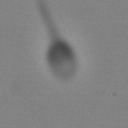

In [8]:
train_ds[0]['image']

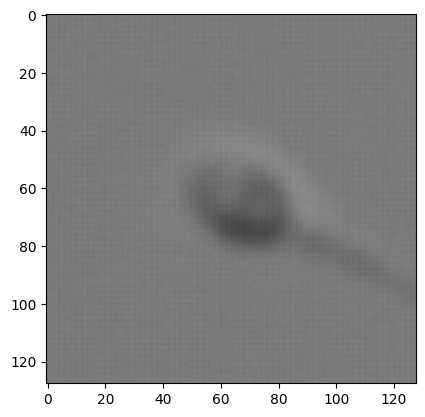

In [12]:
# visualise image using pixel values using matplotlib

import matplotlib.pyplot as plt
# plt.imshow(train_ds[0]['image'])

for i in range(100):
    plt.imshow(train_ds[i]['image'])
    plt.savefig(f"data_viz\\{i}_og.jpg")

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv("scripts\\vit\\head.csv")

In [15]:
df

,Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1 Score
0,1,No log,0.594133,0.733333,0.537778,0.733333,0.620513
1,2,0.638500,0.539073,0.775000,0.783036,0.775000,0.721000
2,3,0.546000,0.541656,0.775000,0.765805,0.775000,0.732051
3,4,0.481000,0.548620,0.783333,0.802976,0.783333,0.731333
4,5,0.384100,0.542008,0.787500,0.782512,0.787500,0.751539
5,6,0.384100,0.524605,0.829167,0.835767,0.829167,0.806817
6,7,0.256500,0.576330,0.808333,0.806984,0.808333,0.782111
7,8,0.160500,0.543301,0.825000,0.817989,0.825000,0.811987
8,9,0.082400,0.600973,0.812500,0.802739,0.812500,0.799379
9,10,0.048900,0.606297,0.812500,0.803162,0.812500,0.797714
